In [1]:
import torch
import torchvision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../../../")

from fedlab.utils.dataset.partition import CIFAR100Partitioner
from fedlab.utils.dataset import functional as F
from fedlab.utils.functional import partition_report

In [2]:
trainset = torchvision.datasets.CIFAR100(root="../../../../data/CIFAR100/", train=True, download=True)

num_clients = 100
num_classes = 100
num_display_classes = 10


col_names = [f"class{i}" for i in range(num_classes)]
display_col_names = [f"class{i}" for i in range(num_display_classes)]

seed = 2021

hist_color = '#4169E1'
plt.rcParams['figure.facecolor'] = 'white'

Files already downloaded and verified


# Hetero Dirichlet

In [3]:
# perform partition
hetero_dir_part = CIFAR100Partitioner(trainset.targets, 
                                num_clients,
                                balance=None, 
                                partition="dirichlet",
                                dir_alpha=0.3,
                                seed=seed)
# save to pkl file
torch.save(hetero_dir_part.client_dict, "cifar100_hetero_dir.pkl")
print(len(hetero_dir_part))

100


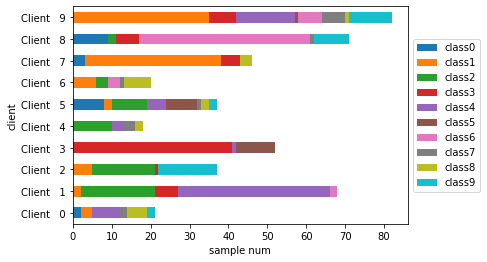

In [4]:
# generate partition report
csv_file = "./partition-reports/cifar100_hetero_dir_0.3_100clients.csv"
partition_report(trainset.targets, hetero_dir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

hetero_dir_part_df = pd.read_csv(csv_file,header=1)
hetero_dir_part_df = hetero_dir_part_df.set_index('client')
for col in col_names:
    hetero_dir_part_df[col] = (hetero_dir_part_df[col] * hetero_dir_part_df['Amount']).astype(int)

# select first 10 clients and first 10 classes for bar plot
hetero_dir_part_df[display_col_names].iloc[:10].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/cifar100_hetero_dir_0.3_100clients.png", dpi=400, bbox_inches = 'tight')

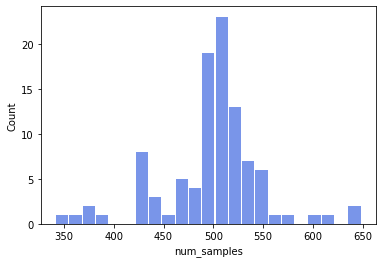

In [5]:
# plot sample number distribution for clients
clt_sample_num_df = hetero_dir_part.client_sample_count
sns.histplot(data=clt_sample_num_df, 
             x="num_samples", 
             edgecolor='none', 
             alpha=0.7, 
             shrink=0.92,
             color=hist_color)
plt.savefig(f"./imgs/cifar100_hetero_dir_0.3_100clients_dist.png", dpi=400, bbox_inches = 'tight')

# Shards Partition

In [6]:
num_shards = 200
shards_part = CIFAR100Partitioner(trainset.targets, 
                                num_clients,
                                balance=None, 
                                partition="shards",
                                num_shards=num_shards,
                                seed=seed)
# # save to pkl file
# torch.save(shards_part.client_dict, "cifar100_shards.pkl")
print(len(shards_part))

100


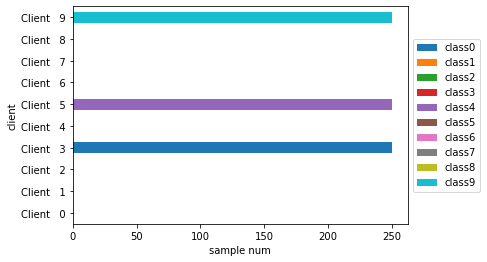

In [7]:
# generate partition report
csv_file = "./partition-reports/cifar100_shards_200_100clients.csv"
partition_report(trainset.targets, shards_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

shards_part_df = pd.read_csv(csv_file,header=1)
shards_part_df = shards_part_df.set_index('client')
for col in col_names:
    shards_part_df[col] = (shards_part_df[col] * shards_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
shards_part_df[display_col_names].iloc[:10].plot.barh(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/cifar100_shards_200_100clients.png", dpi=400, bbox_inches = 'tight')

# Balanced IID

In [8]:
balance_iid_part = CIFAR100Partitioner(trainset.targets, 
                                num_clients,
                                balance=True, 
                                partition="iid",
                                seed=seed)
# # save to pkl file
# torch.save(balance_iid_part.client_dict, "cifar100_balance_iid.pkl")
print(len(balance_iid_part))

100


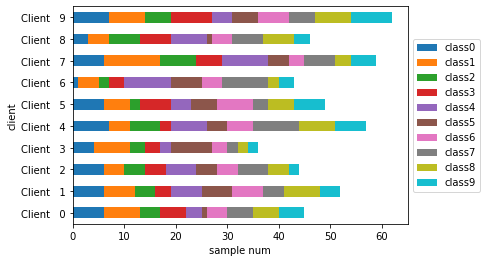

In [9]:
# generate partition report
csv_file = "./partition-reports/cifar100_balance_iid_100clients.csv"
partition_report(trainset.targets, balance_iid_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

balance_iid_part_df = pd.read_csv(csv_file,header=1)
balance_iid_part_df = balance_iid_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    balance_iid_part_df[col] = (balance_iid_part_df[col] * balance_iid_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
balance_iid_part_df[display_col_names].iloc[:10].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/cifar100_balance_iid_100clients.png", dpi=400, bbox_inches = 'tight')

# Unbalanced IID

In [10]:
unbalance_iid_part = CIFAR100Partitioner(trainset.targets, 
                                num_clients,
                                balance=False, 
                                partition="iid",
                                unbalance_sgm=0.3,
                                seed=seed)
# # save to pkl file
# torch.save(unbalance_iid_part.client_dict, "cifar100_unbalance_iid.pkl")
print(len(unbalance_iid_part))

100


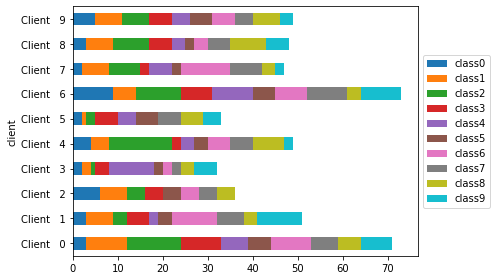

In [11]:
# generate partition report
csv_file = "./partition-reports/cifar100_unbalance_iid_unbalance_sgm_0.3_100clients.csv"
partition_report(trainset.targets, unbalance_iid_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

unbalance_iid_part_df = pd.read_csv(csv_file,header=1)
unbalance_iid_part_df = unbalance_iid_part_df.set_index('client')
for col in col_names:
    unbalance_iid_part_df[col] = (unbalance_iid_part_df[col] * unbalance_iid_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_iid_part_df[display_col_names].iloc[:10].plot.barh(stacked=True)  
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel('sample num')
plt.savefig(f"./imgs/cifar100_unbalance_iid_unbalance_sgm_0.3_100clients.png", dpi=400, bbox_inches = 'tight')

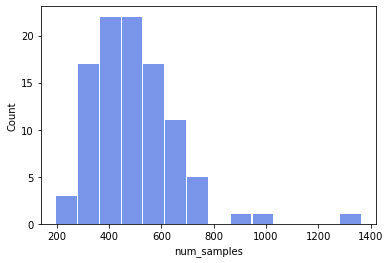

In [12]:
# plot sample number distribution for clients
clt_sample_num_df = unbalance_iid_part.client_sample_count
sns.histplot(data=clt_sample_num_df, 
             x="num_samples", 
             edgecolor='none', 
             alpha=0.7, 
             shrink=0.95,
             color=hist_color)
plt.savefig(f"./imgs/cifar100_unbalance_iid_unbalance_sgm_0.3_100clients_dist.png", dpi=400, bbox_inches = 'tight')

# Balanced Dirichlet

In [13]:
balance_dir_part = CIFAR100Partitioner(trainset.targets, 
                                num_clients,
                                balance=True, 
                                partition="dirichlet",
                                dir_alpha=0.3,
                                seed=seed)
# # save to pkl file
# torch.save(balance_dir_part.client_dict, "cifar100_balance_dir.pkl")
print(len(balance_dir_part))

Remaining Data: 50000
Remaining Data: 49999
Remaining Data: 49998
Remaining Data: 49997
Remaining Data: 49996
Remaining Data: 49995
Remaining Data: 49994
Remaining Data: 49993
Remaining Data: 49992
Remaining Data: 49991
Remaining Data: 49990
Remaining Data: 49989
Remaining Data: 49988
Remaining Data: 49987
Remaining Data: 49986
Remaining Data: 49985
Remaining Data: 49984
Remaining Data: 49983
Remaining Data: 49982
Remaining Data: 49981
Remaining Data: 49980
Remaining Data: 49979
Remaining Data: 49978
Remaining Data: 49977
Remaining Data: 49976
Remaining Data: 49975
Remaining Data: 49974
Remaining Data: 49973
Remaining Data: 49972
Remaining Data: 49971
Remaining Data: 49970
Remaining Data: 49969
Remaining Data: 49968
Remaining Data: 49967
Remaining Data: 49966
Remaining Data: 49965
Remaining Data: 49964
Remaining Data: 49963
Remaining Data: 49962
Remaining Data: 49961
Remaining Data: 49960
Remaining Data: 49959
Remaining Data: 49958
Remaining Data: 49957
Remaining Data: 49956
Remaining 

Remaining Data: 48603
Remaining Data: 48602
Remaining Data: 48601
Remaining Data: 48600
Remaining Data: 48599
Remaining Data: 48598
Remaining Data: 48597
Remaining Data: 48596
Remaining Data: 48595
Remaining Data: 48594
Remaining Data: 48593
Remaining Data: 48592
Remaining Data: 48591
Remaining Data: 48590
Remaining Data: 48589
Remaining Data: 48588
Remaining Data: 48587
Remaining Data: 48586
Remaining Data: 48585
Remaining Data: 48584
Remaining Data: 48583
Remaining Data: 48582
Remaining Data: 48581
Remaining Data: 48580
Remaining Data: 48579
Remaining Data: 48578
Remaining Data: 48577
Remaining Data: 48576
Remaining Data: 48575
Remaining Data: 48574
Remaining Data: 48573
Remaining Data: 48572
Remaining Data: 48571
Remaining Data: 48570
Remaining Data: 48569
Remaining Data: 48568
Remaining Data: 48567
Remaining Data: 48566
Remaining Data: 48565
Remaining Data: 48564
Remaining Data: 48563
Remaining Data: 48562
Remaining Data: 48561
Remaining Data: 48560
Remaining Data: 48559
Remaining 

Remaining Data: 47104
Remaining Data: 47103
Remaining Data: 47102
Remaining Data: 47101
Remaining Data: 47100
Remaining Data: 47099
Remaining Data: 47098
Remaining Data: 47097
Remaining Data: 47096
Remaining Data: 47095
Remaining Data: 47094
Remaining Data: 47093
Remaining Data: 47092
Remaining Data: 47091
Remaining Data: 47090
Remaining Data: 47089
Remaining Data: 47088
Remaining Data: 47087
Remaining Data: 47086
Remaining Data: 47085
Remaining Data: 47084
Remaining Data: 47083
Remaining Data: 47082
Remaining Data: 47081
Remaining Data: 47080
Remaining Data: 47079
Remaining Data: 47078
Remaining Data: 47077
Remaining Data: 47076
Remaining Data: 47075
Remaining Data: 47074
Remaining Data: 47073
Remaining Data: 47072
Remaining Data: 47071
Remaining Data: 47070
Remaining Data: 47069
Remaining Data: 47068
Remaining Data: 47067
Remaining Data: 47066
Remaining Data: 47065
Remaining Data: 47064
Remaining Data: 47063
Remaining Data: 47062
Remaining Data: 47061
Remaining Data: 47060
Remaining 

Remaining Data: 45661
Remaining Data: 45660
Remaining Data: 45659
Remaining Data: 45658
Remaining Data: 45657
Remaining Data: 45656
Remaining Data: 45655
Remaining Data: 45654
Remaining Data: 45653
Remaining Data: 45652
Remaining Data: 45651
Remaining Data: 45650
Remaining Data: 45649
Remaining Data: 45648
Remaining Data: 45647
Remaining Data: 45646
Remaining Data: 45645
Remaining Data: 45644
Remaining Data: 45643
Remaining Data: 45642
Remaining Data: 45641
Remaining Data: 45640
Remaining Data: 45639
Remaining Data: 45638
Remaining Data: 45637
Remaining Data: 45636
Remaining Data: 45635
Remaining Data: 45634
Remaining Data: 45633
Remaining Data: 45632
Remaining Data: 45631
Remaining Data: 45630
Remaining Data: 45629
Remaining Data: 45628
Remaining Data: 45627
Remaining Data: 45626
Remaining Data: 45625
Remaining Data: 45624
Remaining Data: 45623
Remaining Data: 45622
Remaining Data: 45621
Remaining Data: 45620
Remaining Data: 45619
Remaining Data: 45618
Remaining Data: 45617
Remaining 

Remaining Data: 44605
Remaining Data: 44604
Remaining Data: 44603
Remaining Data: 44602
Remaining Data: 44601
Remaining Data: 44600
Remaining Data: 44599
Remaining Data: 44598
Remaining Data: 44597
Remaining Data: 44596
Remaining Data: 44595
Remaining Data: 44594
Remaining Data: 44593
Remaining Data: 44592
Remaining Data: 44591
Remaining Data: 44590
Remaining Data: 44589
Remaining Data: 44588
Remaining Data: 44587
Remaining Data: 44586
Remaining Data: 44585
Remaining Data: 44584
Remaining Data: 44583
Remaining Data: 44582
Remaining Data: 44581
Remaining Data: 44580
Remaining Data: 44579
Remaining Data: 44578
Remaining Data: 44577
Remaining Data: 44576
Remaining Data: 44575
Remaining Data: 44574
Remaining Data: 44573
Remaining Data: 44572
Remaining Data: 44571
Remaining Data: 44570
Remaining Data: 44569
Remaining Data: 44568
Remaining Data: 44567
Remaining Data: 44566
Remaining Data: 44565
Remaining Data: 44564
Remaining Data: 44563
Remaining Data: 44562
Remaining Data: 44561
Remaining 

Remaining Data: 43105
Remaining Data: 43104
Remaining Data: 43103
Remaining Data: 43102
Remaining Data: 43101
Remaining Data: 43100
Remaining Data: 43099
Remaining Data: 43098
Remaining Data: 43097
Remaining Data: 43096
Remaining Data: 43095
Remaining Data: 43094
Remaining Data: 43093
Remaining Data: 43092
Remaining Data: 43091
Remaining Data: 43090
Remaining Data: 43089
Remaining Data: 43088
Remaining Data: 43087
Remaining Data: 43086
Remaining Data: 43085
Remaining Data: 43084
Remaining Data: 43083
Remaining Data: 43082
Remaining Data: 43081
Remaining Data: 43080
Remaining Data: 43079
Remaining Data: 43078
Remaining Data: 43077
Remaining Data: 43076
Remaining Data: 43075
Remaining Data: 43074
Remaining Data: 43073
Remaining Data: 43072
Remaining Data: 43071
Remaining Data: 43070
Remaining Data: 43069
Remaining Data: 43068
Remaining Data: 43067
Remaining Data: 43066
Remaining Data: 43065
Remaining Data: 43064
Remaining Data: 43063
Remaining Data: 43062
Remaining Data: 43061
Remaining 

Remaining Data: 41606
Remaining Data: 41605
Remaining Data: 41604
Remaining Data: 41603
Remaining Data: 41602
Remaining Data: 41601
Remaining Data: 41600
Remaining Data: 41599
Remaining Data: 41598
Remaining Data: 41597
Remaining Data: 41596
Remaining Data: 41595
Remaining Data: 41594
Remaining Data: 41593
Remaining Data: 41592
Remaining Data: 41591
Remaining Data: 41590
Remaining Data: 41589
Remaining Data: 41588
Remaining Data: 41587
Remaining Data: 41586
Remaining Data: 41585
Remaining Data: 41584
Remaining Data: 41583
Remaining Data: 41582
Remaining Data: 41581
Remaining Data: 41580
Remaining Data: 41579
Remaining Data: 41578
Remaining Data: 41577
Remaining Data: 41576
Remaining Data: 41575
Remaining Data: 41574
Remaining Data: 41573
Remaining Data: 41572
Remaining Data: 41571
Remaining Data: 41570
Remaining Data: 41569
Remaining Data: 41568
Remaining Data: 41567
Remaining Data: 41566
Remaining Data: 41565
Remaining Data: 41564
Remaining Data: 41563
Remaining Data: 41562
Remaining 

Remaining Data: 40140
Remaining Data: 40139
Remaining Data: 40138
Remaining Data: 40137
Remaining Data: 40136
Remaining Data: 40135
Remaining Data: 40134
Remaining Data: 40133
Remaining Data: 40132
Remaining Data: 40131
Remaining Data: 40130
Remaining Data: 40129
Remaining Data: 40128
Remaining Data: 40127
Remaining Data: 40126
Remaining Data: 40125
Remaining Data: 40124
Remaining Data: 40123
Remaining Data: 40122
Remaining Data: 40121
Remaining Data: 40120
Remaining Data: 40119
Remaining Data: 40118
Remaining Data: 40117
Remaining Data: 40116
Remaining Data: 40115
Remaining Data: 40114
Remaining Data: 40113
Remaining Data: 40112
Remaining Data: 40111
Remaining Data: 40110
Remaining Data: 40109
Remaining Data: 40108
Remaining Data: 40107
Remaining Data: 40106
Remaining Data: 40105
Remaining Data: 40104
Remaining Data: 40103
Remaining Data: 40102
Remaining Data: 40101
Remaining Data: 40100
Remaining Data: 40099
Remaining Data: 40098
Remaining Data: 40097
Remaining Data: 40096
Remaining 

Remaining Data: 39107
Remaining Data: 39106
Remaining Data: 39105
Remaining Data: 39104
Remaining Data: 39103
Remaining Data: 39102
Remaining Data: 39101
Remaining Data: 39100
Remaining Data: 39099
Remaining Data: 39098
Remaining Data: 39097
Remaining Data: 39096
Remaining Data: 39095
Remaining Data: 39094
Remaining Data: 39093
Remaining Data: 39092
Remaining Data: 39091
Remaining Data: 39090
Remaining Data: 39089
Remaining Data: 39088
Remaining Data: 39087
Remaining Data: 39086
Remaining Data: 39085
Remaining Data: 39084
Remaining Data: 39083
Remaining Data: 39082
Remaining Data: 39081
Remaining Data: 39080
Remaining Data: 39079
Remaining Data: 39078
Remaining Data: 39077
Remaining Data: 39076
Remaining Data: 39075
Remaining Data: 39074
Remaining Data: 39073
Remaining Data: 39072
Remaining Data: 39071
Remaining Data: 39070
Remaining Data: 39069
Remaining Data: 39068
Remaining Data: 39067
Remaining Data: 39066
Remaining Data: 39065
Remaining Data: 39064
Remaining Data: 39063
Remaining 

Remaining Data: 37607
Remaining Data: 37606
Remaining Data: 37605
Remaining Data: 37604
Remaining Data: 37603
Remaining Data: 37602
Remaining Data: 37601
Remaining Data: 37600
Remaining Data: 37599
Remaining Data: 37598
Remaining Data: 37597
Remaining Data: 37596
Remaining Data: 37595
Remaining Data: 37594
Remaining Data: 37593
Remaining Data: 37592
Remaining Data: 37591
Remaining Data: 37590
Remaining Data: 37589
Remaining Data: 37588
Remaining Data: 37587
Remaining Data: 37586
Remaining Data: 37585
Remaining Data: 37584
Remaining Data: 37583
Remaining Data: 37582
Remaining Data: 37581
Remaining Data: 37580
Remaining Data: 37579
Remaining Data: 37578
Remaining Data: 37577
Remaining Data: 37576
Remaining Data: 37575
Remaining Data: 37574
Remaining Data: 37573
Remaining Data: 37572
Remaining Data: 37571
Remaining Data: 37570
Remaining Data: 37569
Remaining Data: 37568
Remaining Data: 37567
Remaining Data: 37566
Remaining Data: 37565
Remaining Data: 37564
Remaining Data: 37563
Remaining 

Remaining Data: 36159
Remaining Data: 36158
Remaining Data: 36157
Remaining Data: 36156
Remaining Data: 36155
Remaining Data: 36154
Remaining Data: 36153
Remaining Data: 36152
Remaining Data: 36151
Remaining Data: 36150
Remaining Data: 36149
Remaining Data: 36148
Remaining Data: 36147
Remaining Data: 36146
Remaining Data: 36145
Remaining Data: 36144
Remaining Data: 36143
Remaining Data: 36142
Remaining Data: 36141
Remaining Data: 36140
Remaining Data: 36139
Remaining Data: 36138
Remaining Data: 36137
Remaining Data: 36136
Remaining Data: 36135
Remaining Data: 36134
Remaining Data: 36133
Remaining Data: 36132
Remaining Data: 36131
Remaining Data: 36130
Remaining Data: 36129
Remaining Data: 36128
Remaining Data: 36127
Remaining Data: 36126
Remaining Data: 36125
Remaining Data: 36124
Remaining Data: 36123
Remaining Data: 36122
Remaining Data: 36121
Remaining Data: 36120
Remaining Data: 36119
Remaining Data: 36118
Remaining Data: 36117
Remaining Data: 36116
Remaining Data: 36115
Remaining 

Remaining Data: 34875
Remaining Data: 34874
Remaining Data: 34873
Remaining Data: 34872
Remaining Data: 34871
Remaining Data: 34870
Remaining Data: 34869
Remaining Data: 34868
Remaining Data: 34867
Remaining Data: 34866
Remaining Data: 34865
Remaining Data: 34864
Remaining Data: 34863
Remaining Data: 34862
Remaining Data: 34861
Remaining Data: 34860
Remaining Data: 34859
Remaining Data: 34858
Remaining Data: 34857
Remaining Data: 34856
Remaining Data: 34855
Remaining Data: 34854
Remaining Data: 34853
Remaining Data: 34852
Remaining Data: 34851
Remaining Data: 34850
Remaining Data: 34849
Remaining Data: 34848
Remaining Data: 34847
Remaining Data: 34846
Remaining Data: 34845
Remaining Data: 34844
Remaining Data: 34843
Remaining Data: 34842
Remaining Data: 34841
Remaining Data: 34840
Remaining Data: 34839
Remaining Data: 34838
Remaining Data: 34837
Remaining Data: 34836
Remaining Data: 34835
Remaining Data: 34834
Remaining Data: 34833
Remaining Data: 34832
Remaining Data: 34831
Remaining 

Remaining Data: 33609
Remaining Data: 33608
Remaining Data: 33607
Remaining Data: 33606
Remaining Data: 33605
Remaining Data: 33604
Remaining Data: 33603
Remaining Data: 33602
Remaining Data: 33601
Remaining Data: 33600
Remaining Data: 33599
Remaining Data: 33598
Remaining Data: 33597
Remaining Data: 33596
Remaining Data: 33595
Remaining Data: 33594
Remaining Data: 33593
Remaining Data: 33592
Remaining Data: 33591
Remaining Data: 33590
Remaining Data: 33589
Remaining Data: 33588
Remaining Data: 33587
Remaining Data: 33586
Remaining Data: 33585
Remaining Data: 33584
Remaining Data: 33583
Remaining Data: 33582
Remaining Data: 33581
Remaining Data: 33580
Remaining Data: 33579
Remaining Data: 33578
Remaining Data: 33577
Remaining Data: 33576
Remaining Data: 33575
Remaining Data: 33574
Remaining Data: 33573
Remaining Data: 33572
Remaining Data: 33571
Remaining Data: 33570
Remaining Data: 33569
Remaining Data: 33568
Remaining Data: 33567
Remaining Data: 33566
Remaining Data: 33565
Remaining 

Remaining Data: 32111
Remaining Data: 32110
Remaining Data: 32109
Remaining Data: 32108
Remaining Data: 32107
Remaining Data: 32106
Remaining Data: 32105
Remaining Data: 32104
Remaining Data: 32103
Remaining Data: 32102
Remaining Data: 32101
Remaining Data: 32100
Remaining Data: 32099
Remaining Data: 32098
Remaining Data: 32097
Remaining Data: 32096
Remaining Data: 32095
Remaining Data: 32094
Remaining Data: 32093
Remaining Data: 32092
Remaining Data: 32091
Remaining Data: 32090
Remaining Data: 32089
Remaining Data: 32088
Remaining Data: 32087
Remaining Data: 32086
Remaining Data: 32085
Remaining Data: 32084
Remaining Data: 32083
Remaining Data: 32082
Remaining Data: 32081
Remaining Data: 32080
Remaining Data: 32079
Remaining Data: 32078
Remaining Data: 32077
Remaining Data: 32076
Remaining Data: 32075
Remaining Data: 32074
Remaining Data: 32073
Remaining Data: 32072
Remaining Data: 32071
Remaining Data: 32070
Remaining Data: 32069
Remaining Data: 32068
Remaining Data: 32067
Remaining 

Remaining Data: 30847
Remaining Data: 30846
Remaining Data: 30845
Remaining Data: 30844
Remaining Data: 30843
Remaining Data: 30842
Remaining Data: 30841
Remaining Data: 30840
Remaining Data: 30839
Remaining Data: 30838
Remaining Data: 30837
Remaining Data: 30836
Remaining Data: 30835
Remaining Data: 30834
Remaining Data: 30833
Remaining Data: 30832
Remaining Data: 30831
Remaining Data: 30830
Remaining Data: 30829
Remaining Data: 30828
Remaining Data: 30827
Remaining Data: 30826
Remaining Data: 30825
Remaining Data: 30824
Remaining Data: 30823
Remaining Data: 30822
Remaining Data: 30821
Remaining Data: 30820
Remaining Data: 30819
Remaining Data: 30818
Remaining Data: 30817
Remaining Data: 30816
Remaining Data: 30815
Remaining Data: 30814
Remaining Data: 30813
Remaining Data: 30812
Remaining Data: 30811
Remaining Data: 30810
Remaining Data: 30809
Remaining Data: 30808
Remaining Data: 30807
Remaining Data: 30806
Remaining Data: 30805
Remaining Data: 30804
Remaining Data: 30803
Remaining 

Remaining Data: 29425
Remaining Data: 29424
Remaining Data: 29423
Remaining Data: 29422
Remaining Data: 29421
Remaining Data: 29420
Remaining Data: 29419
Remaining Data: 29418
Remaining Data: 29417
Remaining Data: 29416
Remaining Data: 29415
Remaining Data: 29414
Remaining Data: 29413
Remaining Data: 29412
Remaining Data: 29411
Remaining Data: 29410
Remaining Data: 29409
Remaining Data: 29408
Remaining Data: 29407
Remaining Data: 29406
Remaining Data: 29405
Remaining Data: 29404
Remaining Data: 29403
Remaining Data: 29402
Remaining Data: 29401
Remaining Data: 29400
Remaining Data: 29399
Remaining Data: 29398
Remaining Data: 29397
Remaining Data: 29396
Remaining Data: 29395
Remaining Data: 29394
Remaining Data: 29393
Remaining Data: 29392
Remaining Data: 29391
Remaining Data: 29390
Remaining Data: 29389
Remaining Data: 29388
Remaining Data: 29387
Remaining Data: 29386
Remaining Data: 29385
Remaining Data: 29384
Remaining Data: 29383
Remaining Data: 29382
Remaining Data: 29381
Remaining 

Remaining Data: 28033
Remaining Data: 28032
Remaining Data: 28031
Remaining Data: 28030
Remaining Data: 28029
Remaining Data: 28028
Remaining Data: 28027
Remaining Data: 28026
Remaining Data: 28025
Remaining Data: 28024
Remaining Data: 28023
Remaining Data: 28022
Remaining Data: 28021
Remaining Data: 28020
Remaining Data: 28019
Remaining Data: 28018
Remaining Data: 28017
Remaining Data: 28016
Remaining Data: 28015
Remaining Data: 28014
Remaining Data: 28013
Remaining Data: 28012
Remaining Data: 28011
Remaining Data: 28010
Remaining Data: 28009
Remaining Data: 28008
Remaining Data: 28007
Remaining Data: 28006
Remaining Data: 28005
Remaining Data: 28004
Remaining Data: 28003
Remaining Data: 28002
Remaining Data: 28001
Remaining Data: 28000
Remaining Data: 27999
Remaining Data: 27998
Remaining Data: 27997
Remaining Data: 27996
Remaining Data: 27995
Remaining Data: 27994
Remaining Data: 27993
Remaining Data: 27992
Remaining Data: 27991
Remaining Data: 27990
Remaining Data: 27989
Remaining 

Remaining Data: 26733
Remaining Data: 26732
Remaining Data: 26731
Remaining Data: 26730
Remaining Data: 26729
Remaining Data: 26728
Remaining Data: 26727
Remaining Data: 26726
Remaining Data: 26725
Remaining Data: 26724
Remaining Data: 26723
Remaining Data: 26722
Remaining Data: 26721
Remaining Data: 26720
Remaining Data: 26719
Remaining Data: 26718
Remaining Data: 26717
Remaining Data: 26716
Remaining Data: 26715
Remaining Data: 26714
Remaining Data: 26713
Remaining Data: 26712
Remaining Data: 26711
Remaining Data: 26710
Remaining Data: 26709
Remaining Data: 26708
Remaining Data: 26707
Remaining Data: 26706
Remaining Data: 26705
Remaining Data: 26704
Remaining Data: 26703
Remaining Data: 26702
Remaining Data: 26701
Remaining Data: 26700
Remaining Data: 26699
Remaining Data: 26698
Remaining Data: 26697
Remaining Data: 26696
Remaining Data: 26695
Remaining Data: 26694
Remaining Data: 26693
Remaining Data: 26692
Remaining Data: 26691
Remaining Data: 26690
Remaining Data: 26689
Remaining 

Remaining Data: 25171
Remaining Data: 25170
Remaining Data: 25169
Remaining Data: 25168
Remaining Data: 25167
Remaining Data: 25166
Remaining Data: 25165
Remaining Data: 25164
Remaining Data: 25163
Remaining Data: 25162
Remaining Data: 25161
Remaining Data: 25160
Remaining Data: 25159
Remaining Data: 25158
Remaining Data: 25157
Remaining Data: 25156
Remaining Data: 25155
Remaining Data: 25154
Remaining Data: 25153
Remaining Data: 25152
Remaining Data: 25151
Remaining Data: 25150
Remaining Data: 25149
Remaining Data: 25148
Remaining Data: 25147
Remaining Data: 25146
Remaining Data: 25145
Remaining Data: 25144
Remaining Data: 25143
Remaining Data: 25142
Remaining Data: 25141
Remaining Data: 25140
Remaining Data: 25139
Remaining Data: 25138
Remaining Data: 25137
Remaining Data: 25136
Remaining Data: 25135
Remaining Data: 25134
Remaining Data: 25133
Remaining Data: 25132
Remaining Data: 25131
Remaining Data: 25130
Remaining Data: 25129
Remaining Data: 25128
Remaining Data: 25127
Remaining 

Remaining Data: 23868
Remaining Data: 23867
Remaining Data: 23866
Remaining Data: 23865
Remaining Data: 23864
Remaining Data: 23863
Remaining Data: 23862
Remaining Data: 23861
Remaining Data: 23860
Remaining Data: 23859
Remaining Data: 23858
Remaining Data: 23857
Remaining Data: 23856
Remaining Data: 23855
Remaining Data: 23854
Remaining Data: 23853
Remaining Data: 23852
Remaining Data: 23851
Remaining Data: 23850
Remaining Data: 23849
Remaining Data: 23848
Remaining Data: 23847
Remaining Data: 23846
Remaining Data: 23845
Remaining Data: 23844
Remaining Data: 23843
Remaining Data: 23842
Remaining Data: 23841
Remaining Data: 23840
Remaining Data: 23839
Remaining Data: 23838
Remaining Data: 23837
Remaining Data: 23836
Remaining Data: 23835
Remaining Data: 23834
Remaining Data: 23833
Remaining Data: 23832
Remaining Data: 23831
Remaining Data: 23830
Remaining Data: 23829
Remaining Data: 23828
Remaining Data: 23827
Remaining Data: 23826
Remaining Data: 23825
Remaining Data: 23824
Remaining 

Remaining Data: 22490
Remaining Data: 22489
Remaining Data: 22488
Remaining Data: 22487
Remaining Data: 22486
Remaining Data: 22485
Remaining Data: 22484
Remaining Data: 22483
Remaining Data: 22482
Remaining Data: 22481
Remaining Data: 22480
Remaining Data: 22479
Remaining Data: 22478
Remaining Data: 22477
Remaining Data: 22476
Remaining Data: 22475
Remaining Data: 22474
Remaining Data: 22473
Remaining Data: 22472
Remaining Data: 22471
Remaining Data: 22470
Remaining Data: 22469
Remaining Data: 22468
Remaining Data: 22467
Remaining Data: 22466
Remaining Data: 22465
Remaining Data: 22464
Remaining Data: 22463
Remaining Data: 22462
Remaining Data: 22461
Remaining Data: 22460
Remaining Data: 22459
Remaining Data: 22458
Remaining Data: 22457
Remaining Data: 22456
Remaining Data: 22455
Remaining Data: 22454
Remaining Data: 22453
Remaining Data: 22452
Remaining Data: 22451
Remaining Data: 22450
Remaining Data: 22449
Remaining Data: 22448
Remaining Data: 22447
Remaining Data: 22446
Remaining 

Remaining Data: 21340
Remaining Data: 21339
Remaining Data: 21338
Remaining Data: 21337
Remaining Data: 21336
Remaining Data: 21335
Remaining Data: 21334
Remaining Data: 21333
Remaining Data: 21332
Remaining Data: 21331
Remaining Data: 21330
Remaining Data: 21329
Remaining Data: 21328
Remaining Data: 21327
Remaining Data: 21326
Remaining Data: 21325
Remaining Data: 21324
Remaining Data: 21323
Remaining Data: 21322
Remaining Data: 21321
Remaining Data: 21320
Remaining Data: 21319
Remaining Data: 21318
Remaining Data: 21317
Remaining Data: 21316
Remaining Data: 21315
Remaining Data: 21314
Remaining Data: 21313
Remaining Data: 21312
Remaining Data: 21311
Remaining Data: 21310
Remaining Data: 21309
Remaining Data: 21308
Remaining Data: 21307
Remaining Data: 21306
Remaining Data: 21305
Remaining Data: 21304
Remaining Data: 21303
Remaining Data: 21302
Remaining Data: 21301
Remaining Data: 21300
Remaining Data: 21299
Remaining Data: 21298
Remaining Data: 21297
Remaining Data: 21296
Remaining 

Remaining Data: 19614
Remaining Data: 19613
Remaining Data: 19612
Remaining Data: 19611
Remaining Data: 19610
Remaining Data: 19609
Remaining Data: 19608
Remaining Data: 19607
Remaining Data: 19606
Remaining Data: 19605
Remaining Data: 19604
Remaining Data: 19603
Remaining Data: 19602
Remaining Data: 19601
Remaining Data: 19600
Remaining Data: 19599
Remaining Data: 19598
Remaining Data: 19597
Remaining Data: 19596
Remaining Data: 19595
Remaining Data: 19594
Remaining Data: 19593
Remaining Data: 19592
Remaining Data: 19591
Remaining Data: 19590
Remaining Data: 19589
Remaining Data: 19588
Remaining Data: 19587
Remaining Data: 19586
Remaining Data: 19585
Remaining Data: 19584
Remaining Data: 19583
Remaining Data: 19582
Remaining Data: 19581
Remaining Data: 19580
Remaining Data: 19579
Remaining Data: 19578
Remaining Data: 19577
Remaining Data: 19576
Remaining Data: 19575
Remaining Data: 19574
Remaining Data: 19573
Remaining Data: 19572
Remaining Data: 19571
Remaining Data: 19570
Remaining 

Remaining Data: 18161
Remaining Data: 18160
Remaining Data: 18159
Remaining Data: 18158
Remaining Data: 18157
Remaining Data: 18156
Remaining Data: 18155
Remaining Data: 18154
Remaining Data: 18153
Remaining Data: 18152
Remaining Data: 18151
Remaining Data: 18150
Remaining Data: 18149
Remaining Data: 18148
Remaining Data: 18147
Remaining Data: 18146
Remaining Data: 18145
Remaining Data: 18144
Remaining Data: 18143
Remaining Data: 18142
Remaining Data: 18141
Remaining Data: 18140
Remaining Data: 18139
Remaining Data: 18138
Remaining Data: 18137
Remaining Data: 18136
Remaining Data: 18135
Remaining Data: 18134
Remaining Data: 18133
Remaining Data: 18132
Remaining Data: 18131
Remaining Data: 18130
Remaining Data: 18129
Remaining Data: 18128
Remaining Data: 18127
Remaining Data: 18126
Remaining Data: 18125
Remaining Data: 18124
Remaining Data: 18123
Remaining Data: 18122
Remaining Data: 18121
Remaining Data: 18120
Remaining Data: 18119
Remaining Data: 18118
Remaining Data: 18117
Remaining 

Remaining Data: 17115
Remaining Data: 17114
Remaining Data: 17113
Remaining Data: 17112
Remaining Data: 17111
Remaining Data: 17110
Remaining Data: 17109
Remaining Data: 17108
Remaining Data: 17107
Remaining Data: 17106
Remaining Data: 17105
Remaining Data: 17104
Remaining Data: 17103
Remaining Data: 17102
Remaining Data: 17101
Remaining Data: 17100
Remaining Data: 17099
Remaining Data: 17098
Remaining Data: 17097
Remaining Data: 17096
Remaining Data: 17095
Remaining Data: 17094
Remaining Data: 17093
Remaining Data: 17092
Remaining Data: 17091
Remaining Data: 17090
Remaining Data: 17089
Remaining Data: 17088
Remaining Data: 17087
Remaining Data: 17086
Remaining Data: 17085
Remaining Data: 17084
Remaining Data: 17083
Remaining Data: 17082
Remaining Data: 17081
Remaining Data: 17080
Remaining Data: 17079
Remaining Data: 17078
Remaining Data: 17077
Remaining Data: 17076
Remaining Data: 17075
Remaining Data: 17074
Remaining Data: 17073
Remaining Data: 17072
Remaining Data: 17071
Remaining 

Remaining Data: 15685
Remaining Data: 15684
Remaining Data: 15683
Remaining Data: 15682
Remaining Data: 15681
Remaining Data: 15680
Remaining Data: 15679
Remaining Data: 15678
Remaining Data: 15677
Remaining Data: 15676
Remaining Data: 15675
Remaining Data: 15674
Remaining Data: 15673
Remaining Data: 15672
Remaining Data: 15671
Remaining Data: 15670
Remaining Data: 15669
Remaining Data: 15668
Remaining Data: 15667
Remaining Data: 15666
Remaining Data: 15665
Remaining Data: 15664
Remaining Data: 15663
Remaining Data: 15662
Remaining Data: 15661
Remaining Data: 15660
Remaining Data: 15659
Remaining Data: 15658
Remaining Data: 15657
Remaining Data: 15656
Remaining Data: 15655
Remaining Data: 15654
Remaining Data: 15653
Remaining Data: 15652
Remaining Data: 15651
Remaining Data: 15650
Remaining Data: 15649
Remaining Data: 15648
Remaining Data: 15647
Remaining Data: 15646
Remaining Data: 15645
Remaining Data: 15644
Remaining Data: 15643
Remaining Data: 15642
Remaining Data: 15641
Remaining 

Remaining Data: 14601
Remaining Data: 14600
Remaining Data: 14599
Remaining Data: 14598
Remaining Data: 14597
Remaining Data: 14596
Remaining Data: 14595
Remaining Data: 14594
Remaining Data: 14593
Remaining Data: 14592
Remaining Data: 14591
Remaining Data: 14590
Remaining Data: 14589
Remaining Data: 14588
Remaining Data: 14587
Remaining Data: 14586
Remaining Data: 14585
Remaining Data: 14584
Remaining Data: 14583
Remaining Data: 14582
Remaining Data: 14581
Remaining Data: 14580
Remaining Data: 14579
Remaining Data: 14578
Remaining Data: 14577
Remaining Data: 14576
Remaining Data: 14575
Remaining Data: 14574
Remaining Data: 14573
Remaining Data: 14572
Remaining Data: 14571
Remaining Data: 14570
Remaining Data: 14569
Remaining Data: 14568
Remaining Data: 14567
Remaining Data: 14566
Remaining Data: 14565
Remaining Data: 14564
Remaining Data: 14563
Remaining Data: 14562
Remaining Data: 14561
Remaining Data: 14560
Remaining Data: 14559
Remaining Data: 14558
Remaining Data: 14557
Remaining 

Remaining Data: 13116
Remaining Data: 13115
Remaining Data: 13114
Remaining Data: 13113
Remaining Data: 13112
Remaining Data: 13111
Remaining Data: 13110
Remaining Data: 13109
Remaining Data: 13108
Remaining Data: 13107
Remaining Data: 13106
Remaining Data: 13105
Remaining Data: 13104
Remaining Data: 13103
Remaining Data: 13102
Remaining Data: 13101
Remaining Data: 13100
Remaining Data: 13099
Remaining Data: 13098
Remaining Data: 13097
Remaining Data: 13096
Remaining Data: 13095
Remaining Data: 13094
Remaining Data: 13093
Remaining Data: 13092
Remaining Data: 13091
Remaining Data: 13090
Remaining Data: 13089
Remaining Data: 13088
Remaining Data: 13087
Remaining Data: 13086
Remaining Data: 13085
Remaining Data: 13084
Remaining Data: 13083
Remaining Data: 13082
Remaining Data: 13081
Remaining Data: 13080
Remaining Data: 13079
Remaining Data: 13078
Remaining Data: 13077
Remaining Data: 13076
Remaining Data: 13075
Remaining Data: 13074
Remaining Data: 13073
Remaining Data: 13072
Remaining 

Remaining Data: 11617
Remaining Data: 11616
Remaining Data: 11615
Remaining Data: 11614
Remaining Data: 11613
Remaining Data: 11612
Remaining Data: 11611
Remaining Data: 11610
Remaining Data: 11609
Remaining Data: 11608
Remaining Data: 11607
Remaining Data: 11606
Remaining Data: 11605
Remaining Data: 11604
Remaining Data: 11603
Remaining Data: 11602
Remaining Data: 11601
Remaining Data: 11600
Remaining Data: 11599
Remaining Data: 11598
Remaining Data: 11597
Remaining Data: 11596
Remaining Data: 11595
Remaining Data: 11594
Remaining Data: 11593
Remaining Data: 11592
Remaining Data: 11591
Remaining Data: 11590
Remaining Data: 11589
Remaining Data: 11588
Remaining Data: 11587
Remaining Data: 11586
Remaining Data: 11585
Remaining Data: 11584
Remaining Data: 11583
Remaining Data: 11582
Remaining Data: 11581
Remaining Data: 11580
Remaining Data: 11579
Remaining Data: 11578
Remaining Data: 11577
Remaining Data: 11576
Remaining Data: 11575
Remaining Data: 11574
Remaining Data: 11573
Remaining 

Remaining Data: 10117
Remaining Data: 10116
Remaining Data: 10115
Remaining Data: 10114
Remaining Data: 10113
Remaining Data: 10112
Remaining Data: 10111
Remaining Data: 10110
Remaining Data: 10109
Remaining Data: 10108
Remaining Data: 10107
Remaining Data: 10106
Remaining Data: 10105
Remaining Data: 10104
Remaining Data: 10103
Remaining Data: 10102
Remaining Data: 10101
Remaining Data: 10100
Remaining Data: 10099
Remaining Data: 10098
Remaining Data: 10097
Remaining Data: 10096
Remaining Data: 10095
Remaining Data: 10094
Remaining Data: 10093
Remaining Data: 10092
Remaining Data: 10091
Remaining Data: 10090
Remaining Data: 10089
Remaining Data: 10088
Remaining Data: 10087
Remaining Data: 10086
Remaining Data: 10085
Remaining Data: 10084
Remaining Data: 10083
Remaining Data: 10082
Remaining Data: 10081
Remaining Data: 10080
Remaining Data: 10079
Remaining Data: 10078
Remaining Data: 10077
Remaining Data: 10076
Remaining Data: 10075
Remaining Data: 10074
Remaining Data: 10073
Remaining 

Remaining Data: 8618
Remaining Data: 8617
Remaining Data: 8616
Remaining Data: 8615
Remaining Data: 8614
Remaining Data: 8613
Remaining Data: 8612
Remaining Data: 8611
Remaining Data: 8610
Remaining Data: 8609
Remaining Data: 8608
Remaining Data: 8607
Remaining Data: 8606
Remaining Data: 8605
Remaining Data: 8604
Remaining Data: 8603
Remaining Data: 8602
Remaining Data: 8601
Remaining Data: 8600
Remaining Data: 8599
Remaining Data: 8598
Remaining Data: 8597
Remaining Data: 8596
Remaining Data: 8595
Remaining Data: 8594
Remaining Data: 8593
Remaining Data: 8592
Remaining Data: 8591
Remaining Data: 8590
Remaining Data: 8589
Remaining Data: 8588
Remaining Data: 8587
Remaining Data: 8586
Remaining Data: 8585
Remaining Data: 8584
Remaining Data: 8583
Remaining Data: 8582
Remaining Data: 8581
Remaining Data: 8580
Remaining Data: 8579
Remaining Data: 8578
Remaining Data: 8577
Remaining Data: 8576
Remaining Data: 8575
Remaining Data: 8574
Remaining Data: 8573
Remaining Data: 8572
Remaining Dat

Remaining Data: 7118
Remaining Data: 7117
Remaining Data: 7116
Remaining Data: 7115
Remaining Data: 7114
Remaining Data: 7113
Remaining Data: 7112
Remaining Data: 7111
Remaining Data: 7110
Remaining Data: 7109
Remaining Data: 7108
Remaining Data: 7107
Remaining Data: 7106
Remaining Data: 7105
Remaining Data: 7104
Remaining Data: 7103
Remaining Data: 7102
Remaining Data: 7101
Remaining Data: 7100
Remaining Data: 7099
Remaining Data: 7098
Remaining Data: 7097
Remaining Data: 7096
Remaining Data: 7095
Remaining Data: 7094
Remaining Data: 7093
Remaining Data: 7092
Remaining Data: 7091
Remaining Data: 7090
Remaining Data: 7089
Remaining Data: 7088
Remaining Data: 7087
Remaining Data: 7086
Remaining Data: 7085
Remaining Data: 7084
Remaining Data: 7083
Remaining Data: 7082
Remaining Data: 7081
Remaining Data: 7080
Remaining Data: 7079
Remaining Data: 7078
Remaining Data: 7077
Remaining Data: 7076
Remaining Data: 7075
Remaining Data: 7074
Remaining Data: 7073
Remaining Data: 7072
Remaining Dat

Remaining Data: 5691
Remaining Data: 5690
Remaining Data: 5689
Remaining Data: 5688
Remaining Data: 5687
Remaining Data: 5686
Remaining Data: 5685
Remaining Data: 5684
Remaining Data: 5683
Remaining Data: 5682
Remaining Data: 5681
Remaining Data: 5680
Remaining Data: 5679
Remaining Data: 5678
Remaining Data: 5677
Remaining Data: 5676
Remaining Data: 5675
Remaining Data: 5674
Remaining Data: 5673
Remaining Data: 5672
Remaining Data: 5671
Remaining Data: 5670
Remaining Data: 5669
Remaining Data: 5668
Remaining Data: 5667
Remaining Data: 5666
Remaining Data: 5665
Remaining Data: 5664
Remaining Data: 5663
Remaining Data: 5662
Remaining Data: 5661
Remaining Data: 5660
Remaining Data: 5659
Remaining Data: 5658
Remaining Data: 5657
Remaining Data: 5656
Remaining Data: 5655
Remaining Data: 5654
Remaining Data: 5653
Remaining Data: 5652
Remaining Data: 5651
Remaining Data: 5650
Remaining Data: 5649
Remaining Data: 5648
Remaining Data: 5647
Remaining Data: 5646
Remaining Data: 5645
Remaining Dat

Remaining Data: 4456
Remaining Data: 4455
Remaining Data: 4454
Remaining Data: 4453
Remaining Data: 4452
Remaining Data: 4451
Remaining Data: 4450
Remaining Data: 4449
Remaining Data: 4448
Remaining Data: 4447
Remaining Data: 4446
Remaining Data: 4445
Remaining Data: 4444
Remaining Data: 4443
Remaining Data: 4442
Remaining Data: 4441
Remaining Data: 4440
Remaining Data: 4439
Remaining Data: 4438
Remaining Data: 4437
Remaining Data: 4436
Remaining Data: 4435
Remaining Data: 4434
Remaining Data: 4433
Remaining Data: 4432
Remaining Data: 4431
Remaining Data: 4430
Remaining Data: 4429
Remaining Data: 4428
Remaining Data: 4427
Remaining Data: 4426
Remaining Data: 4425
Remaining Data: 4424
Remaining Data: 4423
Remaining Data: 4422
Remaining Data: 4421
Remaining Data: 4420
Remaining Data: 4419
Remaining Data: 4418
Remaining Data: 4417
Remaining Data: 4416
Remaining Data: 4415
Remaining Data: 4414
Remaining Data: 4413
Remaining Data: 4412
Remaining Data: 4411
Remaining Data: 4410
Remaining Dat

Remaining Data: 3146
Remaining Data: 3145
Remaining Data: 3144
Remaining Data: 3143
Remaining Data: 3142
Remaining Data: 3141
Remaining Data: 3140
Remaining Data: 3139
Remaining Data: 3138
Remaining Data: 3137
Remaining Data: 3136
Remaining Data: 3135
Remaining Data: 3134
Remaining Data: 3133
Remaining Data: 3132
Remaining Data: 3131
Remaining Data: 3130
Remaining Data: 3129
Remaining Data: 3128
Remaining Data: 3127
Remaining Data: 3126
Remaining Data: 3125
Remaining Data: 3124
Remaining Data: 3123
Remaining Data: 3122
Remaining Data: 3121
Remaining Data: 3120
Remaining Data: 3119
Remaining Data: 3118
Remaining Data: 3117
Remaining Data: 3116
Remaining Data: 3115
Remaining Data: 3114
Remaining Data: 3113
Remaining Data: 3112
Remaining Data: 3111
Remaining Data: 3110
Remaining Data: 3109
Remaining Data: 3108
Remaining Data: 3107
Remaining Data: 3106
Remaining Data: 3105
Remaining Data: 3104
Remaining Data: 3103
Remaining Data: 3102
Remaining Data: 3102
Remaining Data: 3101
Remaining Dat

Remaining Data: 1856
Remaining Data: 1855
Remaining Data: 1854
Remaining Data: 1853
Remaining Data: 1852
Remaining Data: 1851
Remaining Data: 1851
Remaining Data: 1850
Remaining Data: 1850
Remaining Data: 1850
Remaining Data: 1849
Remaining Data: 1849
Remaining Data: 1848
Remaining Data: 1847
Remaining Data: 1846
Remaining Data: 1845
Remaining Data: 1844
Remaining Data: 1844
Remaining Data: 1843
Remaining Data: 1842
Remaining Data: 1841
Remaining Data: 1840
Remaining Data: 1839
Remaining Data: 1839
Remaining Data: 1839
Remaining Data: 1838
Remaining Data: 1837
Remaining Data: 1836
Remaining Data: 1835
Remaining Data: 1834
Remaining Data: 1833
Remaining Data: 1833
Remaining Data: 1832
Remaining Data: 1831
Remaining Data: 1831
Remaining Data: 1830
Remaining Data: 1829
Remaining Data: 1829
Remaining Data: 1828
Remaining Data: 1827
Remaining Data: 1826
Remaining Data: 1826
Remaining Data: 1825
Remaining Data: 1824
Remaining Data: 1823
Remaining Data: 1823
Remaining Data: 1822
Remaining Dat

Remaining Data: 925
Remaining Data: 924
Remaining Data: 923
Remaining Data: 922
Remaining Data: 922
Remaining Data: 922
Remaining Data: 922
Remaining Data: 921
Remaining Data: 920
Remaining Data: 920
Remaining Data: 919
Remaining Data: 919
Remaining Data: 918
Remaining Data: 917
Remaining Data: 917
Remaining Data: 917
Remaining Data: 917
Remaining Data: 917
Remaining Data: 917
Remaining Data: 917
Remaining Data: 916
Remaining Data: 915
Remaining Data: 914
Remaining Data: 914
Remaining Data: 913
Remaining Data: 912
Remaining Data: 911
Remaining Data: 910
Remaining Data: 909
Remaining Data: 908
Remaining Data: 908
Remaining Data: 907
Remaining Data: 906
Remaining Data: 905
Remaining Data: 904
Remaining Data: 903
Remaining Data: 903
Remaining Data: 902
Remaining Data: 902
Remaining Data: 901
Remaining Data: 900
Remaining Data: 900
Remaining Data: 900
Remaining Data: 899
Remaining Data: 899
Remaining Data: 898
Remaining Data: 897
Remaining Data: 897
Remaining Data: 897
Remaining Data: 896


Remaining Data: 423
Remaining Data: 423
Remaining Data: 422
Remaining Data: 422
Remaining Data: 421
Remaining Data: 420
Remaining Data: 420
Remaining Data: 419
Remaining Data: 418
Remaining Data: 417
Remaining Data: 417
Remaining Data: 417
Remaining Data: 416
Remaining Data: 415
Remaining Data: 415
Remaining Data: 414
Remaining Data: 413
Remaining Data: 413
Remaining Data: 412
Remaining Data: 412
Remaining Data: 412
Remaining Data: 412
Remaining Data: 412
Remaining Data: 412
Remaining Data: 412
Remaining Data: 412
Remaining Data: 412
Remaining Data: 411
Remaining Data: 411
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 410
Remaining Data: 409
Remaining Data: 408
Remaining Data: 408
Remaining Data: 408
Remaining Data: 408
Remaining Data: 407
Remaining Data: 407
Remaining Data: 406


Remaining Data: 168
Remaining Data: 168
Remaining Data: 168
Remaining Data: 168
Remaining Data: 168
Remaining Data: 168
Remaining Data: 168
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 167
Remaining Data: 166
Remaining Data: 166
Remaining Data: 166
Remaining Data: 166
Remaining Data: 166
Remaining Data: 166
Remaining Data: 166
Remaining Data: 166
Remaining Data: 166
Remaining Data: 166
Remaining Data: 165
Remaining Data: 165
Remaining Data: 165
Remaining Data: 165
Remaining Data: 164
Remaining Data: 164
Remaining Data: 164
Remaining Data: 164
Remaining Data: 164
Remaining Data: 164


Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 73
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 72
Remaining Data: 71
Remaining Data: 71
Remaining Da

Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 52
Remaining Data: 52
Remaining Data: 52
Remaining Data: 52
Remaining Data: 52
Remaining Data: 52
Remaining Data: 52
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Data: 51
Remaining Da

Remaining Data: 33
Remaining Data: 33
Remaining Data: 33
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 32
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 31
Remaining Data: 30
Remaining Data: 29
Remaining Data: 29
Remaining Data: 29
Remaining Da

Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 23
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Data: 22
Remaining Da

Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Data: 13
Remaining Da

Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 8
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 7
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining Data: 6
Remaining 

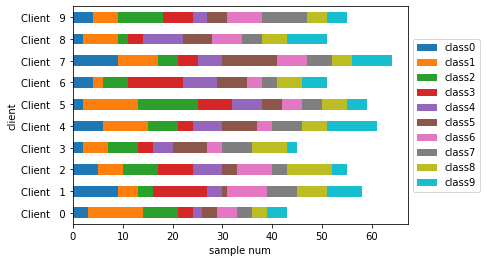

In [14]:
# generate partition report
csv_file = "./partition-reports/cifar100_balance_dir_alpha_0.3_100clients.csv"
partition_report(trainset.targets, balance_dir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

balance_dir_part_df = pd.read_csv(csv_file,header=1)
balance_dir_part_df = balance_dir_part_df.set_index('client')
for col in col_names:
    balance_dir_part_df[col] = (balance_dir_part_df[col] * balance_dir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
balance_dir_part_df[display_col_names].iloc[:10].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/cifar100_balance_dir_alpha_0.3_100clients.png", dpi=400, bbox_inches = 'tight')

# Unbalanced Dirichlet

In [ ]:
unbalance_dir_part = CIFAR100Partitioner(trainset.targets, 
                                num_clients,
                                balance=False, 
                                partition="dirichlet",
                                unbalance_sgm=0.3,
                                dir_alpha=0.3,
                                seed=2020)
# # save to pkl file
# torch.save(unbalance_dir_part.client_dict, "cifar100_unbalance_dir.pkl")
print(len(unbalance_dir_part))

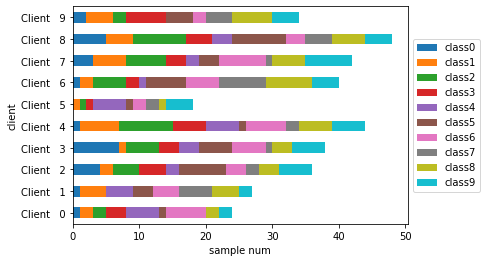

In [19]:
# generate partition report
csv_file = "./partition-reports/cifar100_unbalance_dir_alpha_0.3_unbalance_sgm_0.3_100clients.csv"
partition_report(trainset.targets, unbalance_dir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

unbalance_dir_part_df = pd.read_csv(csv_file,header=1)
unbalance_dir_part_df = unbalance_dir_part_df.set_index('client')
for col in col_names:
    unbalance_dir_part_df[col] = (unbalance_dir_part_df[col] * unbalance_dir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_dir_part_df[display_col_names].iloc[:10].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/cifar100_unbalance_dir_alpha_0.3_unbalance_sgm_0.3_100clients.png", dpi=400, bbox_inches = 'tight')

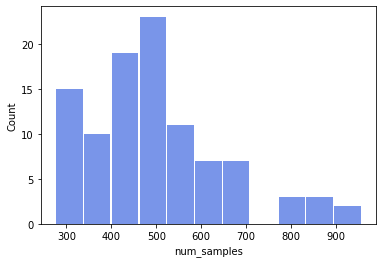

In [20]:
# plot sample number distribution for clients
clt_sample_num_df = unbalance_dir_part.client_sample_count
sns.histplot(data=clt_sample_num_df, 
             x="num_samples", 
             edgecolor='none', 
             alpha=0.7, 
             shrink=0.95,
             color=hist_color)
plt.savefig(f"./imgs/cifar100_unbalance_dir_alpha_0.3_unbalance_sgm_0.3_100clients_dist.png", dpi=400, bbox_inches = 'tight')